In [513]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import warnings
warnings.filterwarnings("ignore")

In [514]:
#Load the dataset
df = pd.read_csv('MTA_Daily_Ridership_Data__2020_-_2025.csv')

# Display the first few rows of the dataset
df.head() 

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,01/01/2021,613692,0.29,378288,0.41,28977,0.35,14988,0.17,5960,0.44,445950,0.65,805,0.29
1,01/01/2022,1027918,0.38,350845,0.29,33980,0.35,30341,0.23,4904,0.34,498515,0.65,1262,0.31
2,01/01/2023,1675507,0.80,475226,0.52,67722,0.82,66309,0.73,11476,0.85,737533,1.08,1771,0.65
3,01/01/2024,1648734,0.79,455965,0.50,82811,1.00,73957,0.82,9165,0.68,730489,1.07,2018,0.74
4,01/01/2025,1779352,0.85,495795,0.54,90318,1.09,74690,0.83,12417,0.92,678296,0.99,2040,0.75


In [515]:
# Selecting relevant columns
df_forecast = df.loc[:, [
    'Date',
    'Subways: Total Estimated Ridership',
    'Buses: Total Estimated Ridership',
    'LIRR: Total Estimated Ridership',
    'Metro-North: Total Estimated Ridership',
    'Staten Island Railway: Total Estimated Ridership'
]].copy() 

# Rename columns
df_forecast.columns = ['Date', 'Subway', 'Bus', 'LIRR', 'MetroNorth', 'StatenIsland']

df_forecast.head()

,Date,Subway,Bus,LIRR,MetroNorth,StatenIsland
0,01/01/2021,613692,378288,28977,14988,805
1,01/01/2022,1027918,350845,33980,30341,1262
2,01/01/2023,1675507,475226,67722,66309,1771
3,01/01/2024,1648734,455965,82811,73957,2018
4,01/01/2025,1779352,495795,90318,74690,2040


In [516]:
#Check for null
print("Missing values per column:")
print(df_forecast.isnull().sum())

Missing values per column:
Date            0
Subway          0
Bus             0
LIRR            0
MetroNorth      0
StatenIsland    0
dtype: int64


In [517]:
#Covert date to datetime
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

df_forecast.head()

,Date,Subway,Bus,LIRR,MetroNorth,StatenIsland
0,2021-01-01,613692,378288,28977,14988,805
1,2022-01-01,1027918,350845,33980,30341,1262
2,2023-01-01,1675507,475226,67722,66309,1771
3,2024-01-01,1648734,455965,82811,73957,2018
4,2025-01-01,1779352,495795,90318,74690,2040


In [518]:
#Set 'Date' as the index
df_forecast.set_index('Date', inplace=True)


#Sort data by date
df_forecast.sort_index(inplace=True)


df_forecast.head()

,Subway,Bus,LIRR,MetroNorth,StatenIsland
Date,,,,,
2020-03-01,2212965,984908,86790,55825,1636
2020-03-02,5329915,2209066,321569,180701,17140
2020-03-03,5481103,2228608,319727,190648,17453
2020-03-04,5498809,2177165,311662,192689,17136
2020-03-05,5496453,2244515,307597,194386,17203


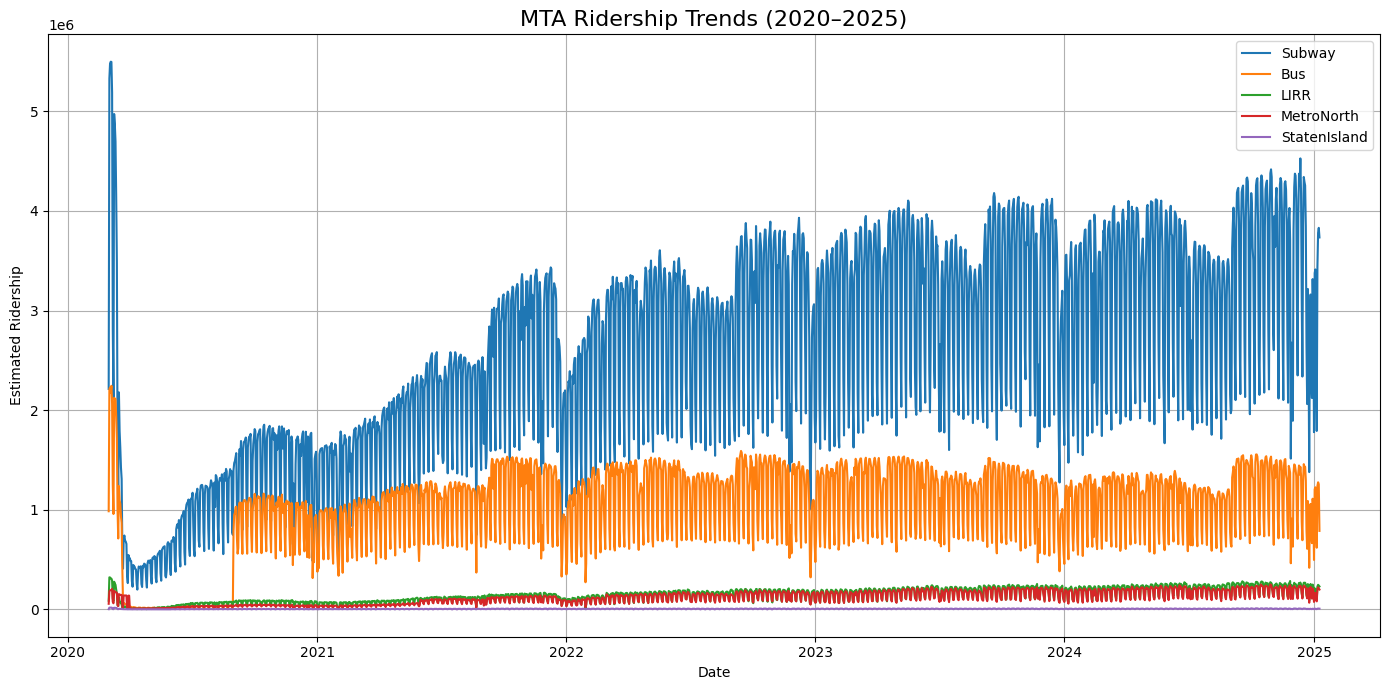

In [519]:
# Set plot size and style
plt.figure(figsize=(14, 7))

# Plot each transportation mode
plt.plot(df_forecast['Subway'], label='Subway')
plt.plot(df_forecast['Bus'], label='Bus')
plt.plot(df_forecast['LIRR'], label='LIRR')
plt.plot(df_forecast['MetroNorth'], label='MetroNorth')
plt.plot(df_forecast['StatenIsland'], label='StatenIsland')

# Add title and labels
plt.title('MTA Ridership Trends (2020–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Estimated Ridership')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


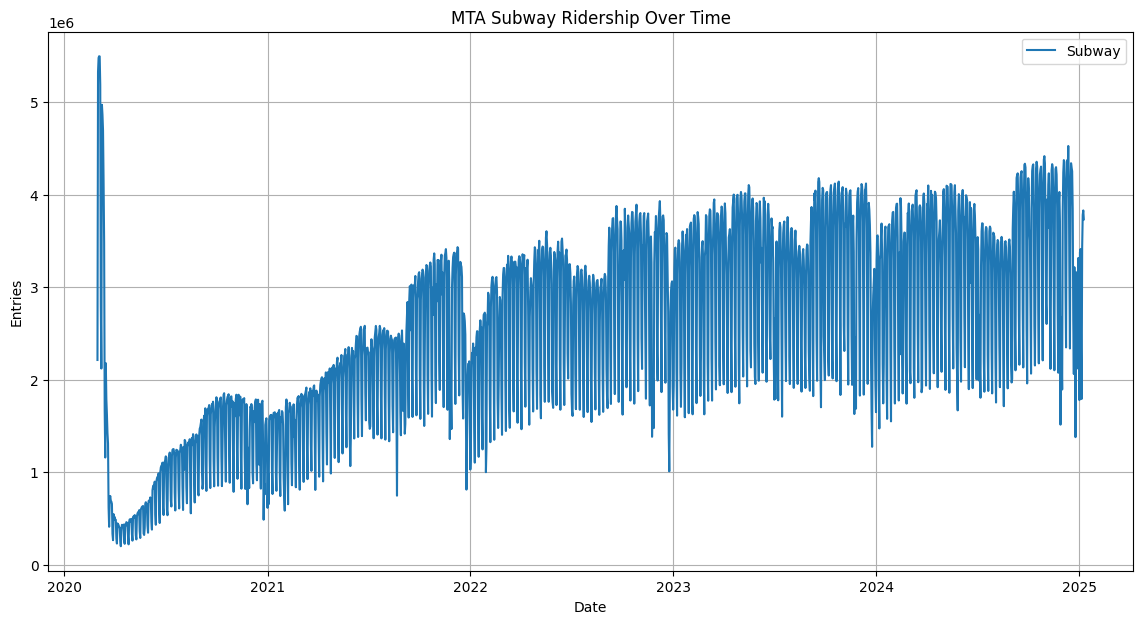

In [520]:
#Visualize Subway Trends
# Set plot size and style
plt.figure(figsize=(14, 7))

#Add labels
plt.plot(df_forecast['Subway'], label='Subway')
plt.title('MTA Subway Ridership Over Time')
plt.ylabel("Entries")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

In [521]:
#Get Subway data from data forecast
subway_df = df_forecast[['Subway']]

#Split the data for training and testing
#Number of rows
n = len(subway_df)

#80% for training
size = int(n*0.8)

#Split the data
train = subway_df.iloc[:size]
test = subway_df.iloc[size:]

In [522]:
from statsmodels.tsa.stattools import adfuller

#Runs Adf test
result = adfuller(train['Subway']) 

print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.014709719230118
p-value: 0.28016087630726183


In [523]:
#Since the time series is not stationary, then we must difference
train_diff = train.diff().dropna()
result2 = adfuller(train_diff['Subway'])

print('ADF Statistic:', result2[0])
print('p-value:', result2[1])

ADF Statistic: -10.54734082790228
p-value: 8.347092882765984e-19


In [524]:
#Make the Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 2, 1))  # (p, d, q)
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Subway   No. Observations:                 1420
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -21012.833
Date:                Sun, 25 May 2025   AIC                          42031.667
Time:                        21:15:39   BIC                          42047.438
Sample:                    03-01-2020   HQIC                         42037.559
                         - 01-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1196      0.057      2.096      0.036       0.008       0.231
ma.L1         -0.9992      0.036    -28.139      0.000      -1.069      -0.930
sigma2      6.037e+11    5.5e-14    1.1e+25      0.0

In [525]:
#Check the last date in the training data set
print(train.index.max()) #2024-01-19

forecast = model_fit.forecast(steps=len(test))
print(forecast)

2024-01-19 00:00:00
2024-01-20    3.120757e+06
2024-01-21    3.115797e+06
2024-01-22    3.116901e+06
2024-01-23    3.118731e+06
2024-01-24    3.120647e+06
                  ...     
2025-01-05    3.789616e+06
2025-01-06    3.791544e+06
2025-01-07    3.793472e+06
2025-01-08    3.795400e+06
2025-01-09    3.797328e+06
Freq: D, Name: predicted_mean, Length: 356, dtype: float64


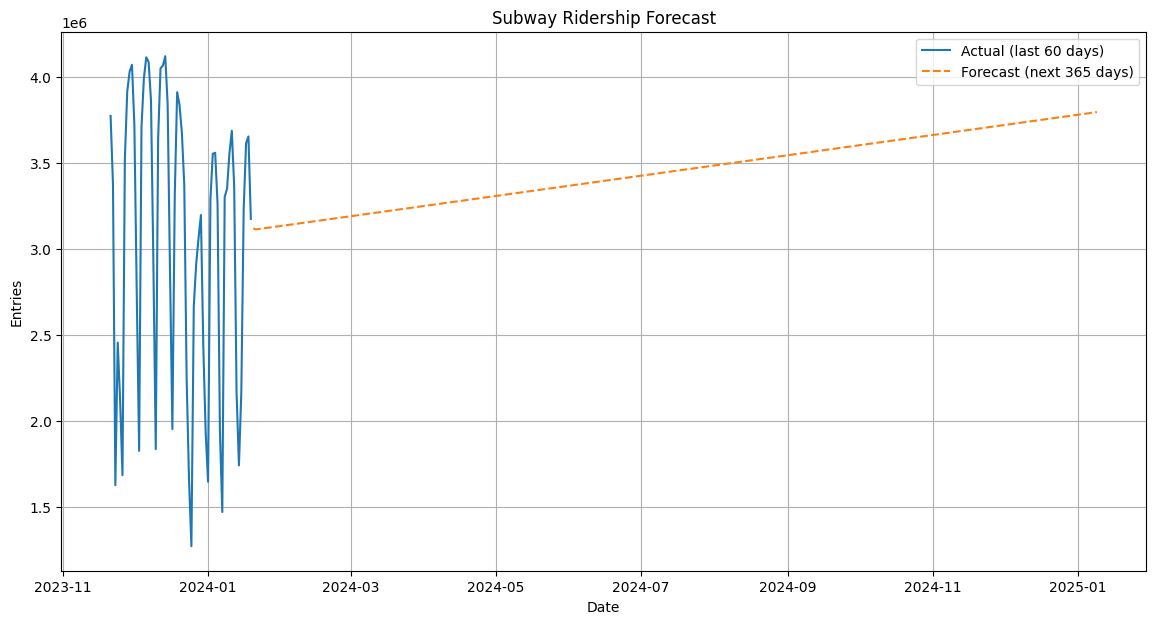

In [526]:
#Visualize the Forecast
# Set plot size and style
plt.figure(figsize=(14, 7))

#Add labels
plt.plot(train['Subway'][-60:], label='Actual (last 60 days)')
plt.plot(forecast.index, forecast, label='Forecast (next 365 days)', linestyle='--')
plt.title("Subway Ridership Forecast")
plt.xlabel("Date")
plt.ylabel("Entries")
plt.legend()
plt.grid(True)
plt.show()

In [527]:
#Forecast specific date

#Get the last date
last_date = train.index.max() #2024-01-19

#Target Date
target_date = pd.to_datetime('2024-06-23')

#Calculate days difference
date_diff = (target_date - last_date).days

print("Days to forecast:", date_diff)

Days to forecast: 156


In [528]:
#Forecasting
specific_forecast = model_fit.forecast(steps=date_diff)

# Extract the prediction for June 6, 2024
prediction = specific_forecast.loc[target_date]

print(f"Predicted subway ridership on {target_date.date()}: {prediction:,.0f}")

Predicted subway ridership on 2024-06-23: 3,411,754


In [529]:
actual_value = test.loc[target_date, 'Subway']
print(f"Actual subway ridership on {target_date.date()}: {actual_value:,.0f}")

Actual subway ridership on 2024-06-23: 1,908,786


In [530]:
#Calculate the error
error = prediction - actual_value
abs(error)

print(f"Absolute error: {error:,.0f}")

Absolute error: 1,502,968


In [531]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

forecast.index = test.index

mae = mean_absolute_error(test['Subway'], forecast)
rmse = root_mean_squared_error(test['Subway'], forecast)

print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")

MAE: 681,050
RMSE: 833,959


In [532]:
#Make the another model, use 7 for MA and AR
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(7, 2, 7))  # (p, d, q)
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Subway   No. Observations:                 1420
Model:                 ARIMA(7, 2, 7)   Log Likelihood              -19908.223
Date:                Sun, 25 May 2025   AIC                          39846.446
Time:                        21:15:42   BIC                          39925.302
Sample:                    03-01-2020   HQIC                         39875.906
                         - 01-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2559      0.024    -51.908      0.000      -1.303      -1.209
ar.L2         -1.2531      0.023    -55.526      0.000      -1.297      -1.209
ar.L3         -1.2519      0.024    -51.948      0.0

In [533]:
#Forecast 727 model
forecast = model_fit.forecast(steps=len(test))

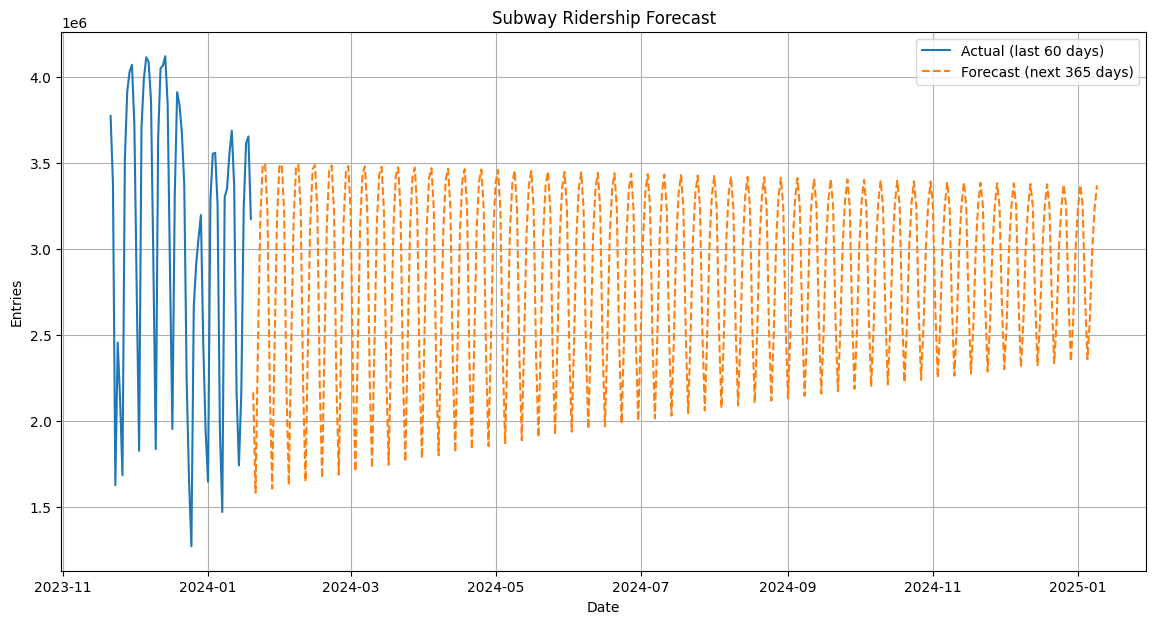

In [534]:
#Visualize the Forecast
# Set plot size and style
plt.figure(figsize=(14, 7))

#Add labels
plt.plot(train['Subway'][-60:], label='Actual (last 60 days)')
plt.plot(forecast.index, forecast, label='Forecast (next 365 days)', linestyle='--')
plt.title("Subway Ridership Forecast")
plt.xlabel("Date")
plt.ylabel("Entries")
plt.legend()
plt.grid(True)
plt.show()

In [535]:
#Forecasting
specific_forecast = model_fit.forecast(steps=date_diff)

# Extract the prediction for June 6, 2024
prediction = specific_forecast.loc[target_date]
print(f"Predicted subway ridership for June 6, 2024: {prediction:,.0f}")

Predicted subway ridership for June 6, 2024: 1,986,790


In [536]:
actual_value = test.loc[target_date, 'Subway']
print(f"Actual subway ridership on {target_date.date()}: {actual_value:,.0f}")

Actual subway ridership on 2024-06-23: 1,908,786


In [537]:
#Calculate the error
error = prediction - actual_value
abs(error)

print(f"Absolute error: {error:,.0f}")

Absolute error: 78,004


In [538]:
forecast.index = test.index

mae = mean_absolute_error(test['Subway'], forecast)
rmse = root_mean_squared_error(test['Subway'], forecast)

print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")

MAE: 534,902
RMSE: 669,300


In [539]:
#Prophet
bus_df = df.loc[:,['Date','Buses: Total Estimated Ridership']].copy()

#Turn date into datetime
bus_df['Date'] = pd.to_datetime(bus_df['Date'])

bus_df.dtypes


Date                                datetime64[ns]
Buses: Total Estimated Ridership             int64
dtype: object

In [540]:
#Rename
bus_df.columns = ['ds', 'y']

#Sort the data
bus_df = bus_df.sort_values('ds')

bus_df.head()

,ds,y
246,2020-03-01,984908
251,2020-03-02,2209066
256,2020-03-03,2228608
261,2020-03-04,2177165
266,2020-03-05,2244515


In [541]:
#Split the data for training and testing
n = len(bus_df)

#80% for training
size = int(n*0.8)

#Split data
bus_train = bus_df.iloc[:size]
bus_test = bus_df.iloc[size:]

In [542]:
from prophet import Prophet

#Create a model
bus_model = Prophet()

#Fit the model to the train data set
bus_model.fit(bus_train)

21:15:42 - cmdstanpy - INFO - Chain [1] start processing
21:15:43 - cmdstanpy - INFO - Chain [1] done processing


In [543]:
#Create future dataframes
bus_future = bus_model.make_future_dataframe(periods=len(bus_test), freq='d')

#Make the prediction
bus_forecast = bus_model.predict(bus_future)

In [544]:
#Visualize the model: Comparing Predicted Values to Actual Values

#Set ds as index
bus_test = bus_test.set_index('ds')
bus_train = bus_train.set_index('ds')

#Slice forecast to match test set only
bus_forecast_test = bus_forecast.loc[bus_test.index]

KeyError: "None of [DatetimeIndex(['2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',\n               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',\n               '2024-01-28', '2024-01-29',\n               ...\n               '2024-12-31', '2025-01-01', '2025-01-02', '2025-01-03',\n               '2025-01-04', '2025-01-05', '2025-01-06', '2025-01-07',\n               '2025-01-08', '2025-01-09'],\n              dtype='datetime64[ns]', name='ds', length=356, freq=None)] are in the [index]"